In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sample Data: Evaluation Metrics for Summarization Models


In [ ]:
data = {
    "Model": ["BART", "T5", "Pegasus", "GPT-3", "XLNet"],
    "ROUGE-1": [0.45, 0.42, 0.48, 0.50, 0.38],  # Higher is better
    "ROUGE-2": [0.22, 0.20, 0.25, 0.30, 0.18],  # Higher is better
    "ROUGE-L": [0.40, 0.37, 0.45, 0.47, 0.34],  # Higher is better
    "Inference Time (sec)": [0.5, 0.6, 0.4, 2.0, 0.8],  # Lower is better
    "Model Size (GB)": [1.5, 1.2, 2.0, 10.0, 0.8]  # Lower is better
}

 Convert dictionary to DataFrame

In [ ]:
df = pd.DataFrame(data)

Weights for each parameter (higher weight to accuracy, moderate to speed & size)

In [ ]:
weights = np.array([0.3, 0.2, 0.3, 0.1, 0.1])

Normalize the matrix

In [ ]:
normalized_matrix = np.column_stack([
    df['ROUGE-1'] / np.max(df['ROUGE-1']),  # Benefit
    df['ROUGE-2'] / np.max(df['ROUGE-2']),  # Benefit
    df['ROUGE-L'] / np.max(df['ROUGE-L']),  # Benefit
    1 - (df['Inference Time (sec)'] / np.max(df['Inference Time (sec)'])),  # Cost
    1 - (df['Model Size (GB)'] / np.max(df['Model Size (GB)']))  # Cost
])

Calculate the weighted normalized decision matrix

In [ ]:
weighted_normalized_matrix = normalized_matrix * weights


 Ideal and Negative Ideal solutions

In [ ]:
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)


Calculate the separation measures

In [ ]:
distance_to_ideal = np.sqrt(np.sum((weighted_normalized_matrix - ideal_solution) ** 2, axis=1))
distance_to_negative_ideal = np.sqrt(np.sum((weighted_normalized_matrix - negative_ideal_solution) ** 2, axis=1))


Calculate the TOPSIS scores

In [ ]:
topsis_scores = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)


Rank the models based on TOPSIS scores

In [ ]:
df['TOPSIS_Score'] = topsis_scores
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)


Sorting the DataFrame by Rank for better visualization

In [ ]:
df = df.sort_values(by='Rank')

Set a color palette for better distinction

In [ ]:
sns.set_palette("viridis")

Create a bar chart

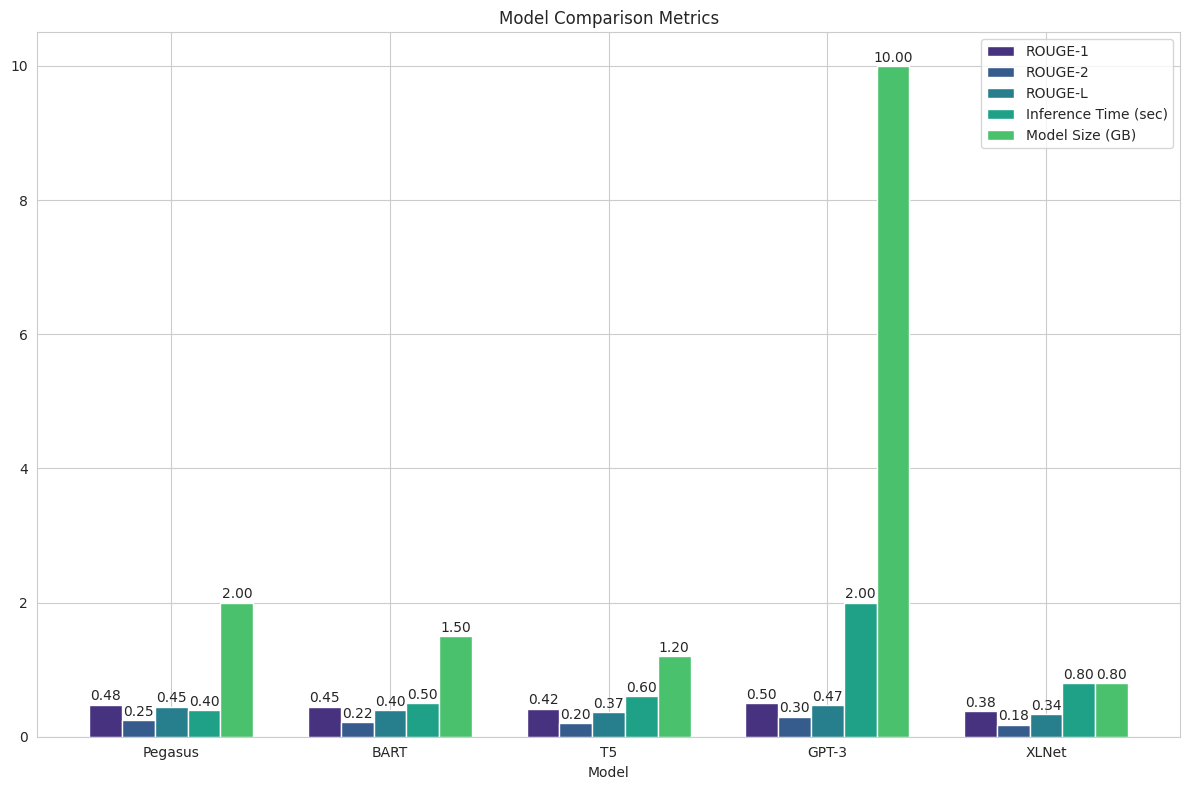

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
bar_spacing = 0.5
bar_positions = np.arange(len(df['Model']))

# Plot each metric separately for better clarity
metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "Inference Time (sec)", "Model Size (GB)"]
for i, metric in enumerate(metrics):
    ax.bar(
        bar_positions + i * bar_width,  # Shift bars for each metric
        df[metric],
        width=bar_width,
        label=metric
    )

ax.set_xticks(bar_positions + (bar_width * (len(metrics) - 1) / 2))
ax.set_xticklabels(df['Model'])
ax.legend()
ax.set_xlabel('Model')
ax.set_title('Model Comparison Metrics')

# Display the values on top of each bar
for i, metric in enumerate(metrics):
    for j, value in enumerate(df[metric]):
        ax.text(
            bar_positions[j] + i * bar_width,
            value + 0.02,  # Adjust height for visibility
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.show()

Visualize TOPSIS Scores

<ipython-input-134-a82dfdc9ba34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Model'], y=df['TOPSIS_Score'], palette="magma")


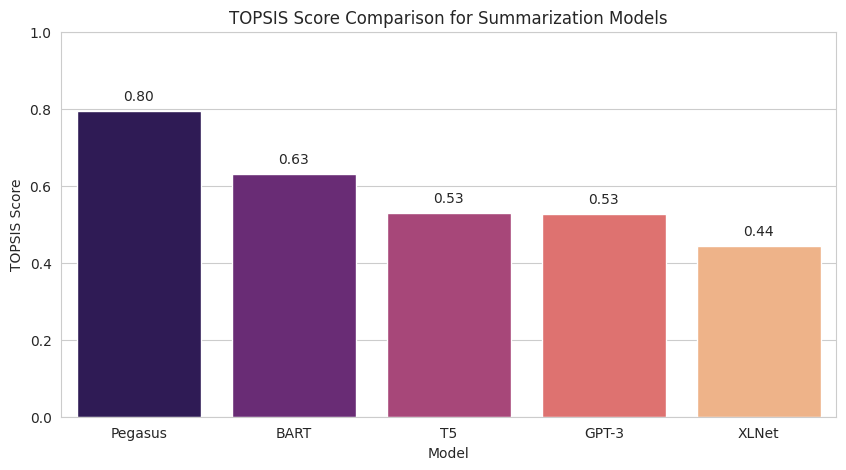

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Model'], y=df['TOPSIS_Score'], palette="magma")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Score Comparison for Summarization Models")
plt.ylim(0, 1)

# Show values on top of bars
for index, value in enumerate(df['TOPSIS_Score']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()

 Print the results

In [ ]:
print("Model Ranking:")
print(df[['Model', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank'))


Model Ranking:
     Model  TOPSIS_Score  Rank
2  Pegasus      0.795052   1.0
0     BART      0.629539   2.0
1       T5      0.528691   3.0
3    GPT-3      0.527120   4.0
4    XLNet      0.444317   5.0


Save results to CSV


In [ ]:
df.to_csv('topsis_results.csv', index=False)